# Problem
We have as input many medical claim forms, that include fields, and their values are filled.

The value could be handwriting, checkbox, machine printed,..etc.

![UNUM_form.png](img/UNUM_form.png)

We want to parse those PDFs, OCR them (using tesseract and custom handwriting recognition models), then produce a structure (JSON) output, saying which field name is assigned which field value.

## Pipeline
The full pipeline is shown below. After a document is OCRed, it is assumed that fields values and names are detected and classified (as name or value) prior to the matching step.

The matching block takes an unordered nor associated list of names and values, together with their text and bbox coordinates (see the Data section). It should produce a list of tuples, with the associated name to its value in JSON format.


![fields_pipeline.png](img/fields_pipeline.png)

# Data
We have 26 docs, with around 450 pairs, annotated as follows:
![UNUM_form.png](img/UNUM_form.png)

## Synthetic data
We don't have enough data, as the amount of needed data should be around 450K! (As in Quora dataset).

So we have to use synthetic data.
Based on manual listing of known field names in the forms, we create a list of public datasets (from https://toolbox.google.com/datasetsearch)

Here's the identified list:

https://docs.google.com/spreadsheets/d/1FG0TLpaGOdaOsCXZ16_aVgf3v_BJk44nzetK0iG7-fI/edit#gid=0

# Field Matching Approach

The matching approach take the whole document fields names and value in JSON format `{{Name_i}_N, {Value_i}_N}`. 

It starts by confining the search area of candidate values to their names, by taking the physical neighborhood (2D circle) around the field name, and list all K-Neigherst Neighbor values to it. 

Then for each candidate, we should have a score function to get an assignemnt score.

Finally, an association technique is used to make the final assignment and produce the final list of associated tuples:
`{(Name_i, Value_i)}_N`

![fields_match_ml_pipeline.png](img/fields_match_ml_pipeline.png)

# Association techniques

The approach depends on a loop on fields names and candidate field values, given that the classificiation and detection of names and value texts is already provided.

To identify the candidate values to names, we can search in some neighborhood around the name, and list all candidate values.

## Greedy
Once we identify the candidates values, we can run the Siamese similarity to give the association scores.

Assignment is then immediately done based on the highest score.

## Auction

Another option is to defer the assignment to a later stage. Instead of immediate assignment, we wait until other field names express their need to associate to different values in the area.

Based on that, we build a 2D score_matrix, and make an "auction" between different assignments.
We can use the Hungarian algo for that.

Details are here:
https://en.wikipedia.org/wiki/Auction_algorithm



___We will start with the greedy assignment for the moment__

# Matching score technique
___Simaese network approach___
Inspired by the work [here](https://github.com/dhwajraj/deep-siamese-text-similarity), we want to use Siamese approach for text matching. Later on, we extent the approach to image matching, and fusion between image and text as well:

![siames_text.png](img/siames_text.png)

## Baseline 1: Text similarity 
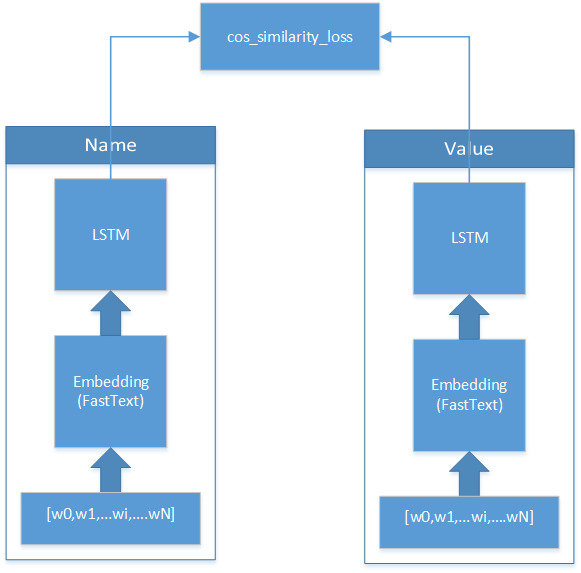

## Baseline 2: Image similarity 
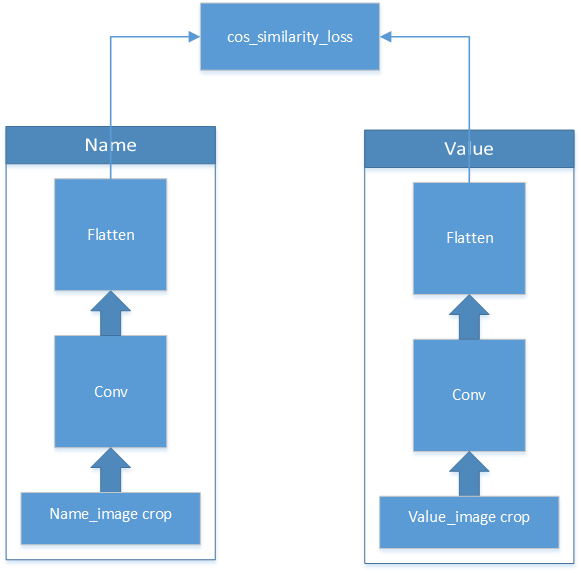

## Baseline 3: Fusion similarity 
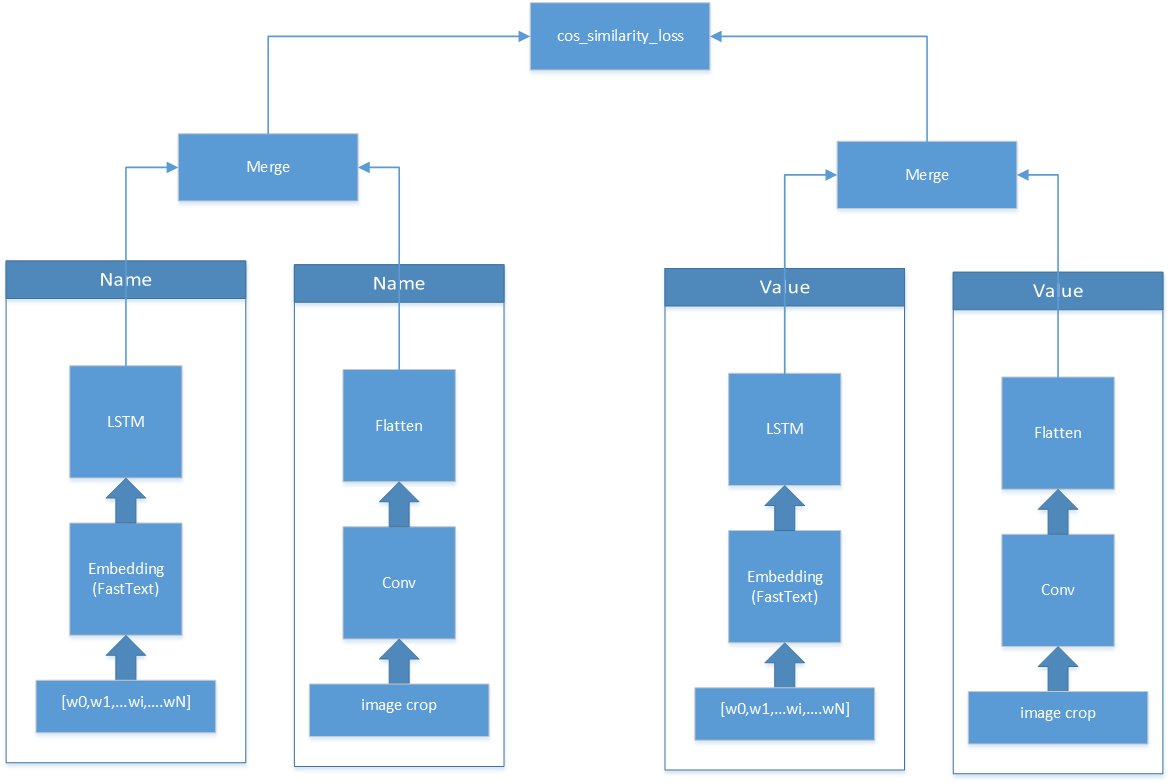


## Basline Results

## Issues
1. Embeddings are done at word level.
__So far the tests are done on clean annotated data.__
Since the OCR output is expected to be noisy, we cannot expect known words to FastText. So we'll have a lot of OOV.

___Proposed solution___
Use char level embeddings.

2. The model sometimes make silly mistakes.
For example, sometimes, it assigns a "Telephone" field to a a text value.

___Proposed solution___
Integrate text classification from NER.

3. The model does not take advantage of the relative positions between fields and values.

___Proposed solution___
Add L1 loss on the bbox centers coordinates of the name and field bbox.

## Char level Embeddings
__ELMO__

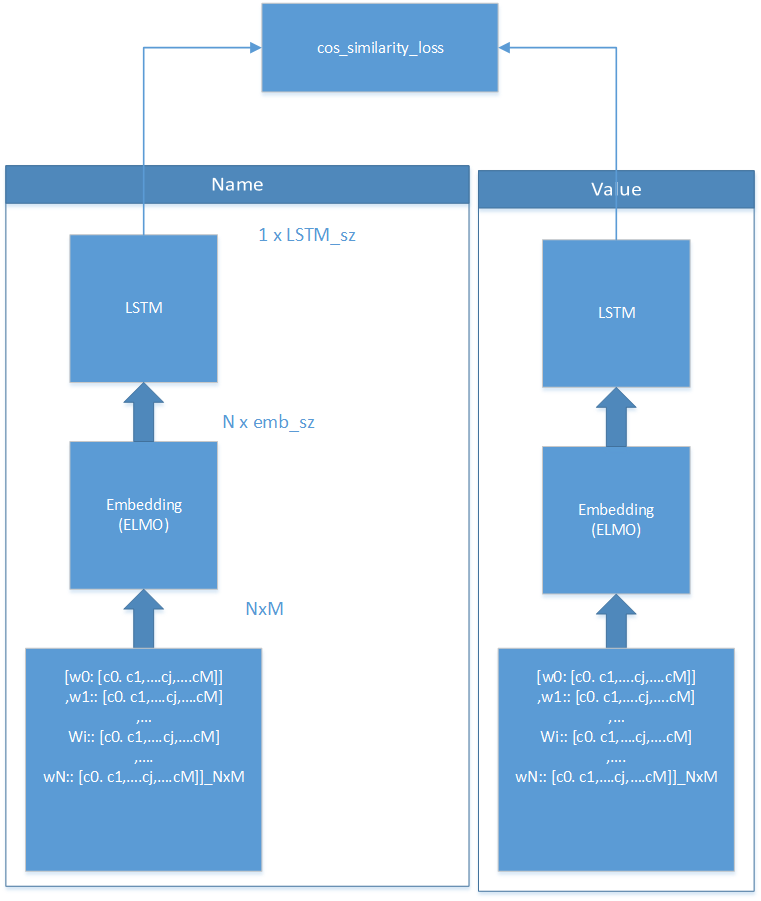

## Adding NER
Use spaCy https://spacy.io/usage/linguistic-features#section-named-entities
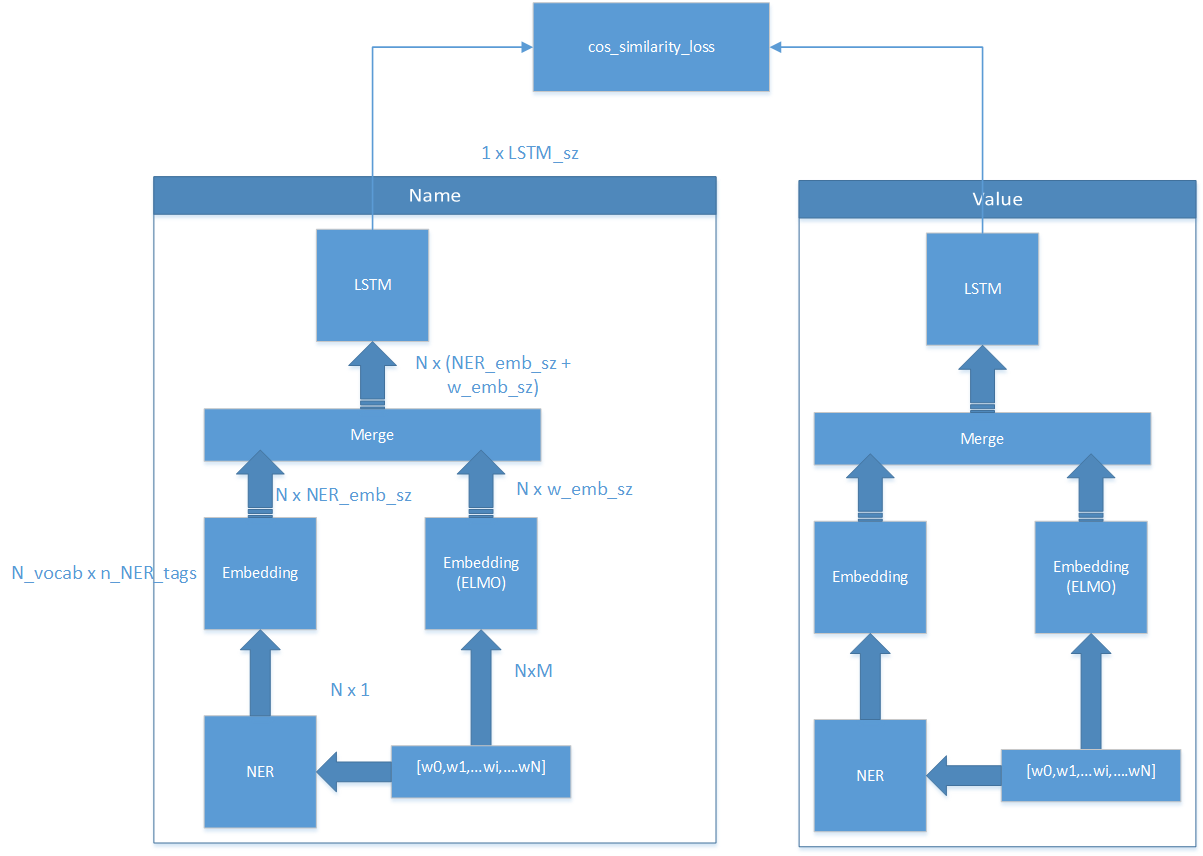

## Adding location clues
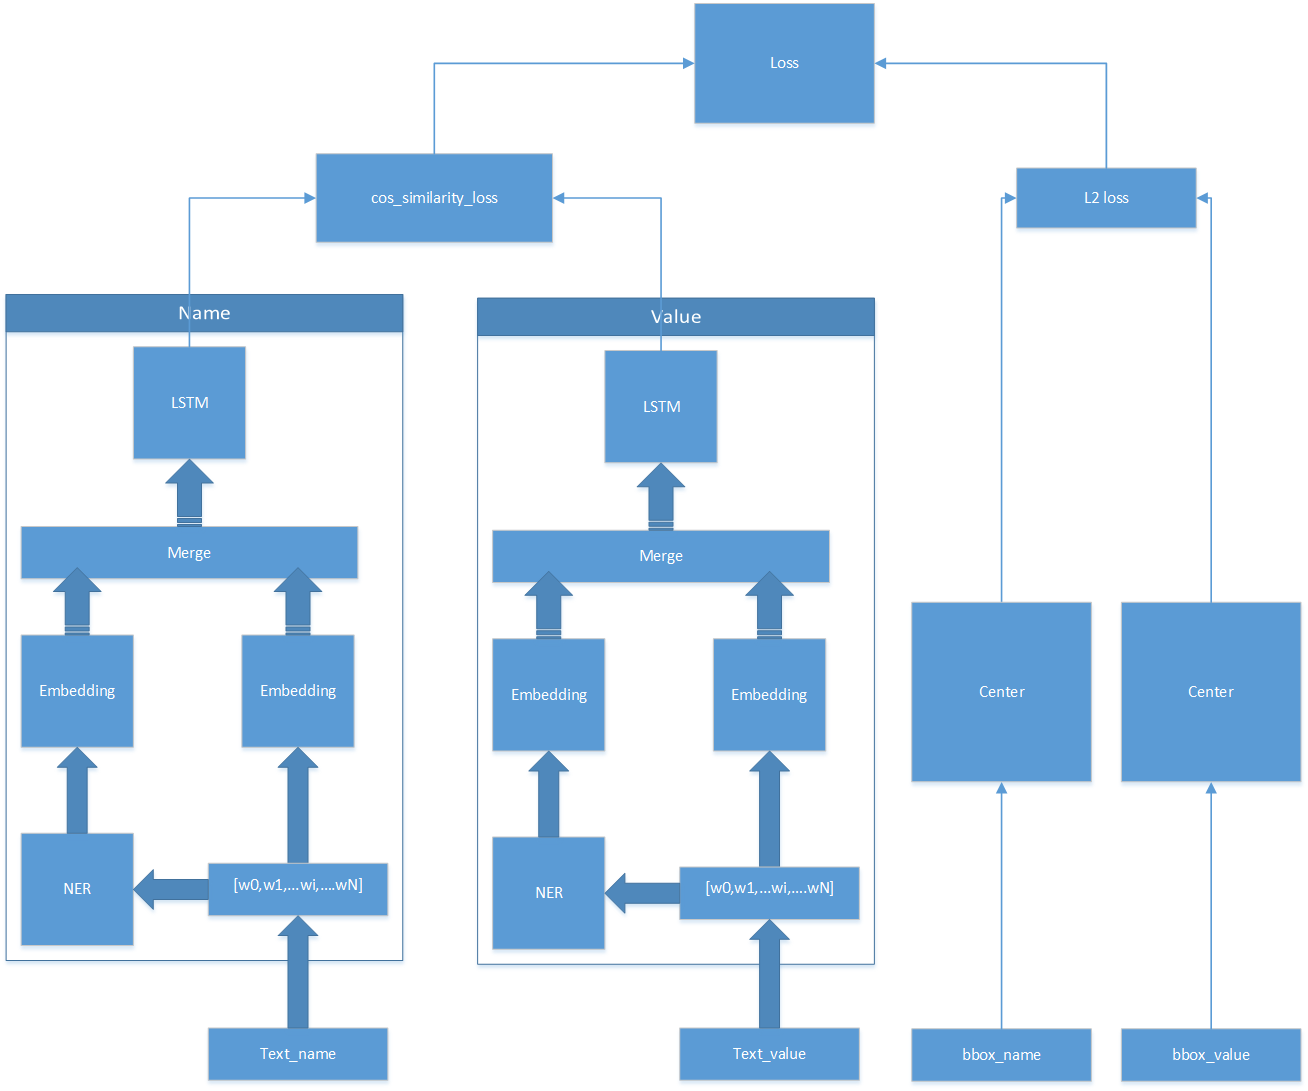